# Path of Exile game stats data eda

dates: 2022.04.30 ~ 

This file contains an analysis processing of the game 'Path of Exile' data.

###### Origins of datas from here: 
poe_stats : https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic

Data contains stats of 59000 players, from 4th August of 2017 and before now.

---

This file made for EDA after altering the original data. (about class and rank)

본격적인 EDA로 첫 EDA 주제는 ladder(game mode)에 따라 분석을 진행하였고,

이번 파일에서는 다음 분석으로 '클래스별'로 나누어 볼 예정입니다.


# Dataset and libraries 

## data and libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

df = pd.read_csv('poe_stats_2revisedrank.csv')

In [2]:
df.head()

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,special_class,stat_Str,stat_Int,stat_Dex,stats_num
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger,1,0,1,0,1
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC,1,0,1,0,1
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger,1,0,1,0,1
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger,1,1,0,1,2
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger,1,0,0,1,1


In [3]:
df.shape

(59776, 17)

## data describes

이루어진 컬럼들, 그리고 간단한 통계량 결과 내어놓기

In [4]:
# columns name

df.columns

Index(['rank', 'dead', 'online', 'name', 'level', 'class', 'id', 'experience',
       'account', 'challenges', 'twitch', 'ladder', 'special_class',
       'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num'],
      dtype='object')

In [5]:
df.describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,59776.000000,59776.000000,5.977600e+04,59776.000000,59776.000000,59776.000000,59776.000000,59776.000000,59776.000000
mean,7472.536386,85.422578,1.825786e+09,25.759569,0.991702,0.582207,0.418027,0.513450,1.513684
std,4314.060306,11.288017,1.094748e+09,8.440888,0.090713,0.493200,0.493239,0.499823,0.614134
min,1.000000,53.000000,7.790982e+07,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3736.750000,78.000000,7.774697e+08,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,7472.500000,90.000000,1.934010e+09,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,11208.250000,95.000000,2.876117e+09,33.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,14981.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.describe(include='object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


## describe result understanding (same with previous file)

##### 1. rank
rank가 이루어진 순위는 15000이나 50%에 7472로 있는 것을 볼 수 있다. 

rank의 빈 곳을 일부 채워 넣었기 때문이며, rank max 값 또한 15000이었으나 14981로 수정되어있다.

##### 2. level
이들의 평균 level 은 85이다. 최대 level이 100이지만 대부분 숙련자라는 뜻이며, 이들 중 50%에 해당하는 랭커들이 90레벨 이상이다. 또한 그들 중 25%에 해당하는 사람들이 95레벨 이상이었다. 

*(레벨은 경험이 많은 유저일 수록 레벨이 높고, 그들이 상위 랭크에 올라가있을 확률또한 높으며, 게임이 오래될 수록 신규 유저의 유입은 줄어들어서 전체 유저들의 평균 레벨 자체가 올라가기 때문에 크게 의미를 두지 않을 생각이다.)*

##### 3. exp
경험치는 레벨 자체와 비슷하게 여길 수 있으나 평균이 1.825786e+09, 50%가 1.934010e+09, max값이 4.250334e+09 이다.

그러나 표준편차가 1.094748e+09이다. 가장 작은 값은 7.790982e+07 인데 이와 비교해보기만 해도 상당히 큰 표준편차인 것을 확인할 수 있다.

최소 레벨이 53임을 함께 견주어 볼때, 일반적인 RPG가 그렇듯 레벨이 올라갈 수록 경험치를 더 많이 쌓아야 레벨을 올릴 수 있음을 예상해 볼 수 있는 부분이다. 

##### 4. challenges
도전 횟수로 생각이 된다. 해당 게임 모드를 몇 번을 수행을 했는지에 대한 것으로 생각된다. 적은 사람은 4번이지만 많은 사람은 40번이며,

이 15000등 안에 드는 사람들은 평균적으로 25회 정도 시도한 사람들이었다는 것을 확인할 수 있다.

##### 5. 'special_class', 'stat_Str', 'stat_Int', 'stat_Dex', 'stats_num'
이 부분은 임의로 내가 넣은 부분으로, 클래스를 스탯으로 나누어 쉽게 구분할 수 있도록 만들었다. 

직업 자체도 직업 자체지만, 해당 스킬을 찍기 위해 스탯을 올린다던지, 그렇게 올린 스탯을 더 잘 활용하기 위해 직업을 선택했을 수 있는 부분이 보였기 때문이다.

##### 6. name
비슷한 이름을 쓰는 경우가 많은 가보다. '_Flic_' 이라는 이름이 등장한 것은, 인기있는 이름이었거나 혹은 동일 유저가 많은 계정을 썼을 수도 있다.

확실한 건 이 게임은 같은 닉네임을 허용하는 게임인 것이라는 점이다.

##### 7. class
19개 의 전직 클래스와 7개의 전직 이전 클래스 총 26개가 보인다.

가장 많이 등장한 직업은 스탯 중 힘만 찍는 Marauder 계열의 'Berserker'이고 총 8711 번 등장한다고 한다.

##### 8. id and account
id는 unique 하다. 게임 내에서 캐릭터가 구분되어야 하기 때문일 것이다. 하지만 한 계정이 최대 30번 등장한다. 계정당 만들 수 있는 캐릭터가 제한이 없...나? (게임마다 캐릭터 슬롯을 확장하는 데에 현금을 요구하기도 하기 때문에 이해하지만 30개라니. 다양한 스탯으로 다양한 직업을 할 수 있는 점에서 수긍은 가는 부분.)

30개를 만든 사람은 바로 'chuz101'이라는 유저이다.

재미있는 부분은 6만 여개에 이르는 랭커 순위에서, 사실 unique account, 즉 실제 유저 자체는 6만 여명이 아니라 37123명인 점이다. 

그리고 이 또한 같은 사람이 여러 account를 쓸 가능성도 있기 때문에 실제 랭커는 더욱 줄어들 수 있다. (twitch 아이디로 찾아보면 나오겠지...?)

##### 9. twitch
유일하게 null 값이 있었던 컬럼이다. 실시간 스트리밍을 했는지 안했는지는 모르지만 해당 유저가 자신의 트위치 아이디를 등록을 했는지 안했는지에 따라 나오는 것으로 보인다. 

정확한 사실을 알면 더 좋겠지만, 이 컬럼 자체로 이 사람이 스밍을 하는 트위치 유저였는지 아니면 입력하래서 가지고 있는 트위치 계정을 입력했을 뿐인지는 큰 차이이기 때문에 동일 유저를 판별하는 부분에서만 사용할 수 있을 것으로 생각된다.

위에 계정 개수를 생각했을 때 유니크값이 9613개인 것을 보면 랭커 4명중 1명은 트위치 계정을 갖고있다.

그리고 총 16300 레코드가 기록되어 있으므로 같은 유저의 다 계정이 확실시 되는 부분이다.

'thespunkylobster' 라고 성급한 바닷가재라는 사람이 총 18번 등장했다고 한다.

##### 10. ladder
이전에 자세히 다루었던 부분이지만, 이 데이터를 크게 구분짓는 줄기라고 생각된다. 왜냐하면 게임모드이고, 게임모드의 난이도나 파티플레이 가능 여부는 게임 플레이에서 큰 영향을 끼친다.

숙련되지 않은 사람을 버스태울(!)수도 있고, 클래스별로 분포도 갈릴 것이다. 이후 자세히 볼 예정이다.

---

*분석의 목적을 정확히 정하고 싶지만 이 게임에서 랭킹에 드는 기준조차 제대로 모르기 때문에, 랭커들의 직업이나 특성들을 찾아보는 것을 주 목적으로 하되, 데이터로 게임(맥락)을 이해할 수 있을지 궁금한 부분도 있어서 최대한 많은 생각을 하면서 분석을 진행하려 한다.*

In [7]:
df.nunique()

rank             14981
dead                 2
online               2
name             58286
level               48
class               26
id               59776
experience       54124
account          37123
challenges          37
twitch            9613
ladder               4
special_class        2
stat_Str             2
stat_Int             2
stat_Dex             2
stats_num            3
dtype: int64

In [8]:
df.isnull().sum()

rank                 0
dead                 0
online               0
name                 0
level                0
class                0
id                   0
experience           0
account              0
challenges           0
twitch           43476
ladder               0
special_class        0
stat_Str             0
stat_Int             0
stat_Dex             0
stats_num            0
dtype: int64

## 전처리: drop columns

본 파일에서는 클래스를 중심으로 레벨, 경험치, 죽음이나, 시도 횟수 등을 볼 것이기 때문에 name과 account, twitch는 제거하도록 할 것이다. 

유저와 관련한 상세한 데이터분석은 다른 파일에서 진행할 것!

다른 것들은 겹칠 수 있어서 고유 값이 필요하므로 id는 남겨두기로 한다.

In [9]:
df.drop(columns = ['name', 'account', 'twitch'], inplace = True)

# Division with 'class' in this file

## class divising conditions

```
각 클래스 나누기 (전직하지 않은 사람들도 있기 때문에 각 전직 이전 직업도 넣어준다.)

# 한 개인 직업
Marauder = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain'] # Strength
Witch = ['Witch', 'Necromancer', 'Elementalist', 'Occultist'] # Intelligence
Ranger = ['Ranger', 'Raider', 'Deadeye', 'Pathfinder'] # Dexterity

# 두 개인 직업
Duelist = ['Duelist', 'Slayer', 'Gladiator', 'Champion'] # Strength, Dexterity
Shadow = ['Shadow', 'Assassin', 'Saboteur', 'Trickster'] # Dexterity, Intelligence
Templar = ['Templar', 'Inquisitor', 'Hierophant', 'Guardian'] # Intelligence, Strength

# 세 개인 직업
Scion = ['Scion', 'Ascendant'] # Strength, Dexterity, Intelligence
```

In [10]:
"""
이후 데이터를 조금 쉽게 활용하기 위해 나누었던 컬럼을 사용할 부분을 적어둔다.
"""

# 전직을 선택하지 않은 직업
con_pre_classes = df['special_class'] == 0

# 각 스탯을 찍은 상태
con_str = df['stat_Str'] == 1
con_int = df['stat_Int'] == 1
con_dex = df['stat_Dex'] == 1

In [11]:
# condition 확인용 Marauder

df[con_str & ~con_int & ~con_dex]['class'].unique()

array(['Chieftain', 'Berserker', 'Juggernaut', 'Marauder'], dtype=object)

# each stats distribution

## Only one stats

고유한 id는 지웠으나 rank는 

In [12]:
# 힘에 올인한 랭커유저는 전체랭커 중 얼마나 될까?

print("Marauders(Only Strenth characters) rate :")
print(df[con_str & ~con_int & ~con_dex]['id'].count()/df['id'].count() * 100)

Marauders(Only Strenth characters) rate :
21.69097965738758


In [13]:
# 민첩에 올인한 랭커유저는 전체랭커 중 얼마나 될까?

print("Witches(Only Dexterity characters) rate :")
print(df[~con_str & ~con_int & con_dex]['id'].count()/df['id'].count() * 100)

Witches(Only Dexterity characters) rate :
16.99009635974304


In [14]:
# 지능에 올인한 랭커유저는 전체랭커 중 얼마나 될까?

print("Rangers(Only Intellegence characters) rate :")
print(df[~con_str & con_int & ~con_dex]['id'].count()/df['id'].count() * 100)

Rangers(Only Intellegence characters) rate :
16.317585653104924


## Two stats

In [15]:
# 힘과 민첩을 올린 랭커유저는 전체랭커 중 얼마나 될까?

print("Duelists(Strenth and Dexterity stats characters) rate :")
print(df[con_str & ~con_int & con_dex]['id'].count()/df['id'].count() * 100)

Duelists(Strenth and Dexterity stats characters) rate :
19.516193790149895


In [16]:
# 민첩과 지능을 올린 랭커유저는 전체랭커 중 얼마나 될까?

print("Shadows(Dexterity and Intellegence stats characters) rate :")
print(df[~con_str & ~con_int & con_dex]['id'].count()/df['id'].count() * 100)

Shadows(Dexterity and Intellegence stats characters) rate :
16.99009635974304


In [17]:
# 지능과 힘을 올린 랭커유저는 전체랭커 중 얼마나 될까?

print("Templars(Intellegence and Strenth stats characters) rate :")
print(df[con_str & con_int & ~con_dex]['id'].count()/df['id'].count() * 100)

Templars(Intellegence and Strenth stats characters) rate :
10.646413276231263


## Thre stats - Scions

In [18]:
# 세 스탯을 골고루 하길 원한 랭커유저는 전체랭커 중 얼마나 될까?

print("Scions(all three stats characters) rate :")
print(df[df['stats_num'] == 3]['id'].count()/df['id'].count() * 100)

Scions(all three stats characters) rate :
6.367103854389722


## 분석의 편의상 라벨링을 해야할 필요성을 느껴서 진행

In [19]:
# 분석상 편의를 위해 직업군 라벨링을 해야하는 상황이 와서 컬럼을 만들기로 했다.

# 한 개인 직업
Marauder = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain'] # Strength
Witch = ['Witch', 'Necromancer', 'Elementalist', 'Occultist'] # Intelligence
Ranger = ['Ranger', 'Raider', 'Deadeye', 'Pathfinder'] # Dexterity

# 두 개인 직업
Duelist = ['Duelist', 'Slayer', 'Gladiator', 'Champion'] # Strength, Dexterity
Shadow = ['Shadow', 'Assassin', 'Saboteur', 'Trickster'] # Dexterity, Intelligence
Templar = ['Templar', 'Inquisitor', 'Hierophant', 'Guardian'] # Intelligence, Strength

# 세 개인 직업
Scion = ['Scion', 'Ascendant'] # Strength, Dexterity, Intelligence

In [20]:
df['pre_class'] = '1'
conditionlist = [
    (con_str & ~con_int & ~con_dex),
    (~con_str & con_int & ~con_dex),
    (~con_str & ~con_int & con_dex),
    (con_str & ~con_int & con_dex),
    (~con_str & con_int & con_dex),
    (con_str & con_int & ~con_dex),
    (con_str & con_int & con_dex)]
choicelist = ['M', 'W', 'R', 'D', 'S', 'T', 'Sc']
df['pre_class'] = np.select(conditionlist, choicelist, default='Not Specified')

In [21]:
df['pre_class'].unique()

array(['W', 'D', 'R', 'T', 'M', 'Sc', 'S'], dtype=object)

In [22]:
df.sample(5)

,rank,dead,online,level,class,id,experience,challenges,ladder,special_class,stat_Str,stat_Int,stat_Dex,stats_num,pre_class
20148,5025,False,False,96,Pathfinder,8b83ede93f80fb1ffcfbb0ed7abf26581503afda0da29d...,3116422137,40,Harbinger,1,0,0,1,1,R
5484,1370,False,False,98,Gladiator,bf67666be21105c3818c83de2a8fde82a3360d46d51b41...,3874077463,30,Harbinger,1,1,0,1,2,D
14456,3621,False,False,88,Gladiator,322bfee9328cace6bcba808751744bde4cf42b7339564b...,1665616300,22,SSF Harbinger,1,1,0,1,2,D
15367,3834,False,False,96,Slayer,819d9927611bff6241bef2cbf2e2054f930ac71be02ec4...,3239305008,40,Harbinger,1,1,0,1,2,D
54933,13701,False,False,89,Slayer,26e952ea704285927d0811a0472a75d7dd405736ea3375...,1831875522,39,Hardcore Harbinger,1,1,0,1,2,D


## preference of stats - 시각화

전체적으로 세 스텟 중 가장 선호되는 능력은?

In [23]:
df_stats = df[['stat_Str','stat_Dex', 'stat_Int']]

<AxesSubplot:>

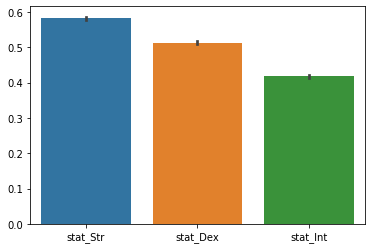

In [24]:
sns.barplot(data= df_stats)

힘인 것으로 나타났다.

## preference of classes by pre_class, by stats_num 시각화

그렇다면 직업별 선호도는 어떻게 될까?

<AxesSubplot:xlabel='pre_class', ylabel='Count'>

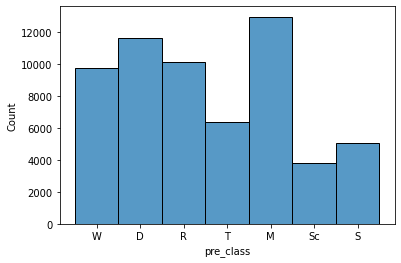

In [25]:
sns.histplot(data=df, x = 'pre_class')

## preference of stats number 시각화

직업자체보다 몇 가지를 찍는 것에 대해 더 중요하게 생각하는 경우는 이런 그래프를 그릴 수 있을 것이다.

<AxesSubplot:xlabel='stats_num', ylabel='Count'>

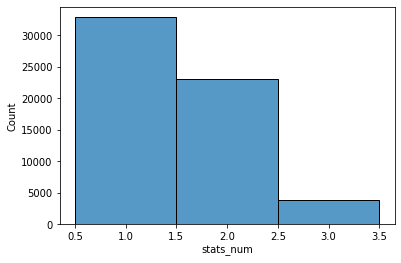

In [77]:
sns.histplot(data = df, x = 'stats_num', fill = True, discrete = True) 

# discrete 옵션은 이산형인지를 따지는 것으로, 딱 이런 경우에 필요한 옵션이다.

# level, rank

## means of rank and level

이미 이들은 충분히 상위 랭크이지만, 그 중에서도 직업에 따라 더 높은 랭크가 있지않을까?

직업군에 따라 그들의 레벨도 차이가 있지 않을까?

순위이기 때문에 중간값 자체를 평균을 대체할 수 있는 값으로 생각하여 함께 넣었다.

In [27]:
# 중간값

df.pivot_table(index = ['stat_Str','stat_Dex', 'stat_Int'], aggfunc = 'median')

challenges  dead    experience  level  online  \
stat_Str stat_Dex stat_Int                                                  
0        0        1                 24   0.0  1.692471e+09     88     0.0   
         1        0                 29   0.0  2.853477e+09     94     0.0   
                  1                 24   0.0  1.400795e+09     86     0.0   
1        0        0                 25   0.0  1.934010e+09     90     0.0   
                  1                 24   0.0  1.799050e+09     89     0.0   
         1        0                 25   0.0  1.927951e+09     89     0.0   
                  1                 25   0.0  1.905394e+09     89     0.0   

                              rank  special_class  stats_num  
stat_Str stat_Dex stat_Int                                    
0        0        1         7397.5              1          1  
         1        0         7355.0              1          1  
                  1         7836.5              1          2  
1        0        0         7551.0              1          1  
                  1         7771.0              1          2  
         1        0         7160.5              1          2  
                  1         7707.5              1          3

In [28]:
# 평균

df.pivot_table(index = ['stat_Str','stat_Dex', 'stat_Int'], aggfunc = 'mean')

challenges      dead    experience      level  \
stat_Str stat_Dex stat_Int                                                  
0        0        1          24.463092  0.384970  1.635681e+09  83.540086   
         1        0          29.120618  0.185112  2.348853e+09  89.500492   
                  1          24.036335  0.398499  1.452039e+09  82.181280   
1        0        0          25.627025  0.345133  1.828874e+09  85.758445   
                  1          24.641263  0.402420  1.648498e+09  83.678190   
         1        0          25.348191  0.384022  1.804477e+09  85.561203   
                  1          25.988702  0.370993  1.765743e+09  85.025749   

                              online         rank  special_class  stats_num  
stat_Str stat_Dex stat_Int                                                   
0        0        1         0.013328  7445.416650       0.987800          1  
         1        0         0.030032  7382.341375       0.995274          1  
                  1         0.007504  7686.580964       0.990916          2  
1        0        0         0.012109  7549.249807       0.992673          1  
                  1         0.008014  7627.751571       0.988843          2  
         1        0         0.012001  7276.447968       0.994428          2  
                  1         0.013137  7578.089858       0.986337          3

### Commentary

*랭크는 낮을수록, 레벨은 높을 수록!*

이미 이들은 충분히 상위 랭크이지만, 그 중에서도 더 높은 랭크가 있지않을까?

> 랭크는 순위개념이라 중간값을 보았을 때, 상대적으로 랭크가 조금더 높은 사람들은 Str+Dex조합(듀얼리스트)이나 Dex만 찍은 직업군(레인저)인 경우가 많았다.

> 물론 직업군간의 인원 차이도 고려를 하고 계산을 해본다면 비슷해질 수도 있을 것 같다는 생각이다.

직업군에 따라 그들의 레벨도 차이가 있지 않을까?

> 직업군에 따라 레벨차이는 많이 나지는 않았으나 상대적으로 Dex만 찍은 직업군이 평균 레벨이 높은 편이었고,

> Dex+Int 조합이나 Int만, 혹은 Str+Int 조합이 평균 레벨이 상대적으로 낮았다.

---

또한 아래처럼 pre_class를 구한 것으로 볼수도 있다. 

## medians of rank and level with class name

In [29]:
df.pivot_table(index = 'pre_class', aggfunc = 'median')

,challenges,dead,experience,level,online,rank,special_class,stat_Dex,stat_Int,stat_Str,stats_num
pre_class,,,,,,,,,,,
D,25,0.0,1.927951e+09,89,0.0,7160.5,1,1,0,1,2
M,25,0.0,1.934010e+09,90,0.0,7551.0,1,0,0,1,1
R,29,0.0,2.853477e+09,94,0.0,7355.0,1,1,0,0,1
S,24,0.0,1.400795e+09,86,0.0,7836.5,1,1,1,0,2
Sc,25,0.0,1.905394e+09,89,0.0,7707.5,1,1,1,1,3
T,24,0.0,1.799050e+09,89,0.0,7771.0,1,0,1,1,2
W,24,0.0,1.692471e+09,88,0.0,7397.5,1,0,1,0,1


## Level distribution - violinplot

각각 유저들의 수가 차이가 나기 때문에 이렇게 보도록 한다.

<AxesSubplot:xlabel='pre_class', ylabel='level'>

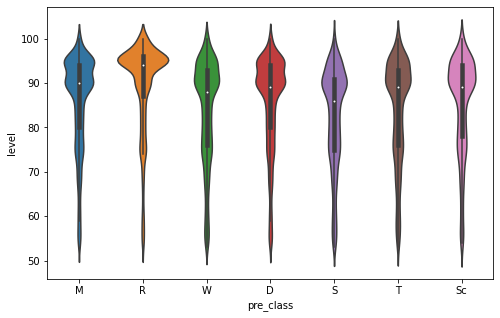

In [83]:
# 전체 직업 함께 비교

plt.rcParams["figure.figsize"] = (8, 5)
sns.violinplot(data = df, x = 'pre_class', y = 'level', order = ['M', 'R', 'W', 'D', 'S', 'T', 'Sc'])

<AxesSubplot:xlabel='pre_class', ylabel='level'>

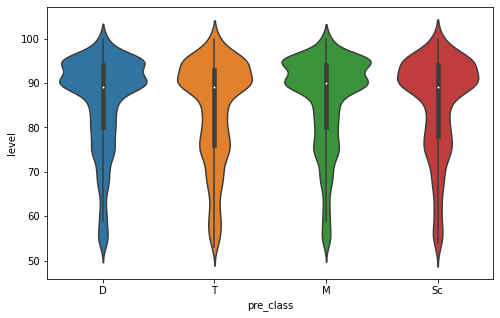

In [85]:
# 힘을 찍은 직업군의 비교

plt.rcParams["figure.figsize"] = (8, 5)
sns.violinplot(data = df[df['stat_Str'] == 1], x = 'pre_class', y = 'level')

<AxesSubplot:xlabel='pre_class', ylabel='level'>

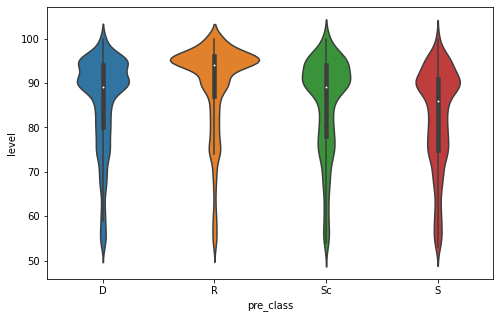

In [80]:
# 민첩을 찍은 직업군의 비교

plt.rcParams["figure.figsize"] = (8, 5)
sns.violinplot(data = df[df['stat_Dex'] == 1], x = 'pre_class', y = 'level')

<AxesSubplot:xlabel='pre_class', ylabel='level'>

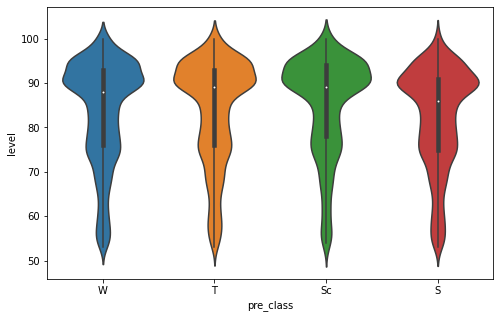

In [81]:
# 지능을 찍은 직업군의 비교

plt.rcParams["figure.figsize"] = (8, 5)
sns.violinplot(data = df[df['stat_Int'] == 1], x = 'pre_class', y = 'level')

### Commentary

레벨별 분포를 보면 우선 전부 50레벨 이상인것을 알아야 한다. 이들은 충분한 숙련도가 있는 사람들이라는 전제가 있다.

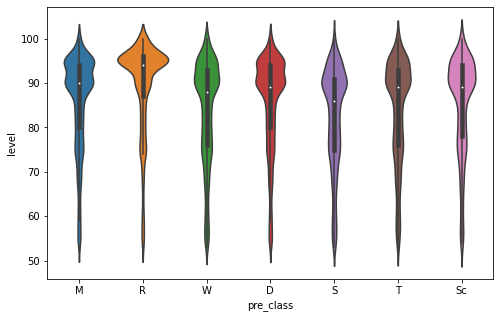

이것을 보면 유독 Ranger(민첩만 찍은) 직업군이 좀더 높은 레벨에서 많은 수를 보이고 있다는 것을 알 수 있다.

실제로 민첩을 찍은 다른 직업군들과도 비교가 되는데, ranger의 많은 유저가 95레벨 정도의 고레벨에 많이 분포하는 것으로 나타났다.

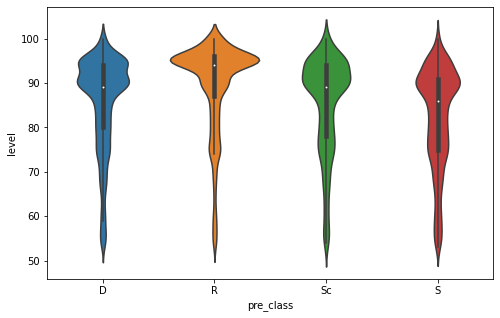

## Rank distribution 

<AxesSubplot:xlabel='pre_class', ylabel='rank'>

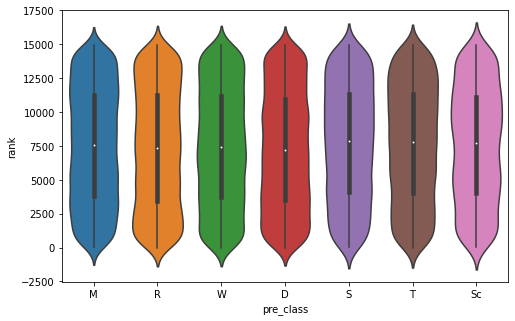

In [87]:
# 우선 바이을린 플롯을 그려본다.
# 전체 직업 함께 비교

plt.rcParams["figure.figsize"] = (8, 5)
sns.violinplot(data = df, x = 'pre_class', y = 'rank', order = ['M', 'R', 'W', 'D', 'S', 'T', 'Sc'])

*그럴줄알았어....*

바이올린 플롯은 해당 분포를 적절하게 보여줄 수 있는 그래프가 아니며, 보여줄 수 있는 그래프가 무엇이 있을까 고민해보았지만 

<AxesSubplot:xlabel='pre_class', ylabel='rank'>

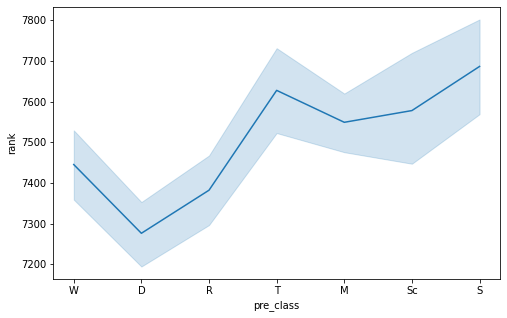

In [100]:
sns.lineplot(x = 'pre_class', y = 'rank', data = df)

## level 과 rank에 선형관계가 있는가?

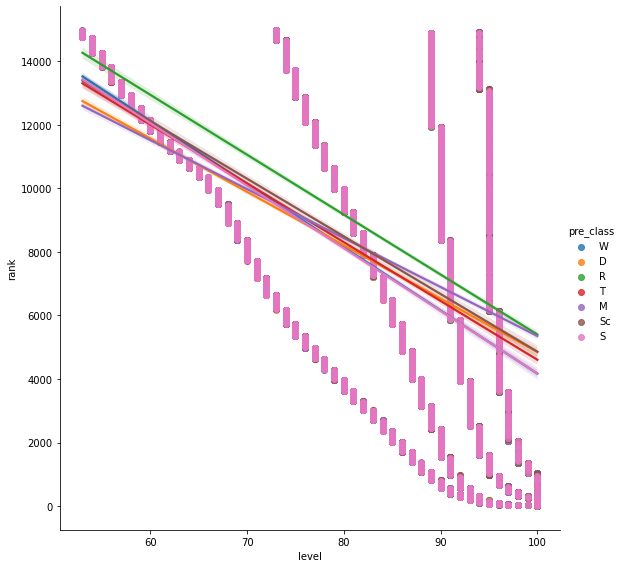

In [89]:
# 선형관계를 보기위한 lmplot

sns.lmplot(x="level", y="rank", hue="pre_class", height=8, data=df)
plt.show()

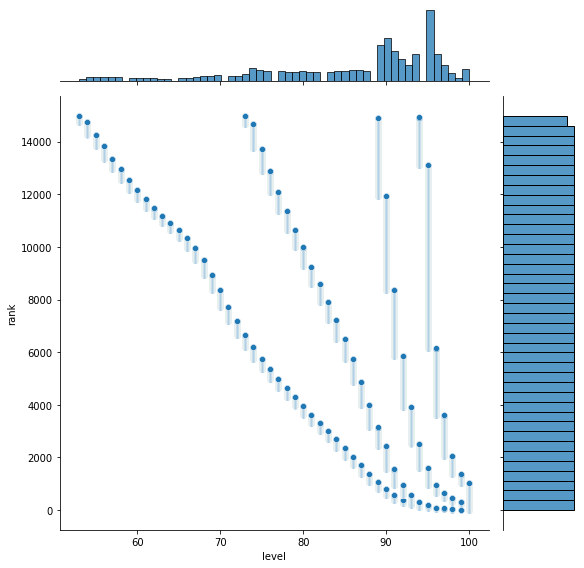

In [90]:
# 산점도와 히스토그램을 동시에 본다.

sns.jointplot(x="level", y="rank", height=8, data=df)
plt.show()

# ladder

클래스별로 특정 래더에서 더 좋은 성능을 낼 수도 있지 않을까?

그럼 클래스별로 어느 래더에 더 분포되어있는지 볼 수 있을 것이다.

## class-ladder

<AxesSubplot:xlabel='pre_class', ylabel='Count'>

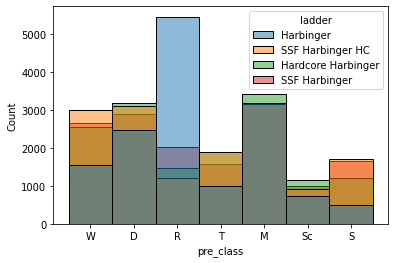

In [36]:
sns.histplot(data=df, x = 'pre_class', hue = 'ladder')

재미있는 결과가 나왔다. Ranger 직업군이 Harbinger 기본모드에 많이 분포되어있는 것으로 나타났다. 

그러나 그래프가 내가 보기원하는 것을 잘 보여주는 것 같지는 않아서 다시 그려보기로 했다.

<AxesSubplot:xlabel='pre_class', ylabel='Count'>

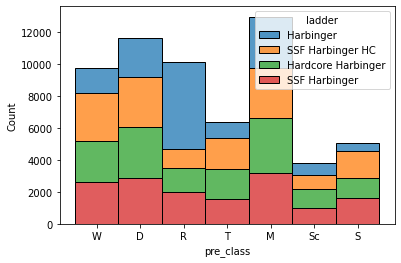

In [38]:
sns.histplot(data=df, x = 'pre_class', hue = 'ladder', multiple = 'stack')

총 직업군 숫자에 맞게 잘 나온 것 같다. 클래스 별로 어떤 모드에서 더 많이 사용되는 것이 있을 텐데, 전체적으로는 Marauder 가 선호되는 편이지만

각 모드에서 Marauder 더 선호되는 클래스가 분명 있을 것이기 때문이다. 그를 보기위해 보는 모드를 달리해본다.

<AxesSubplot:xlabel='pre_class', ylabel='Count'>

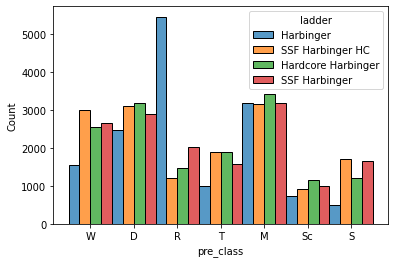

In [39]:
sns.histplot(data=df, x = 'pre_class', hue = 'ladder', multiple = 'dodge')

좀 띄워줄래?

<AxesSubplot:xlabel='pre_class', ylabel='count'>

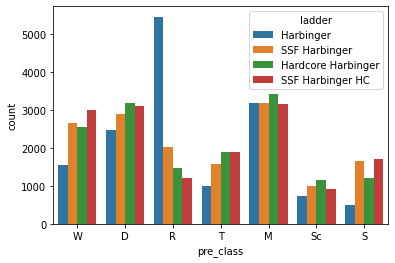

In [58]:
sns.countplot(data = df, x = 'pre_class', hue = 'ladder', hue_order = ['Harbinger', 'SSF Harbinger', 'Hardcore Harbinger', 'SSF Harbinger HC'])

## one stat class 만 모아본다면

<AxesSubplot:xlabel='pre_class', ylabel='count'>

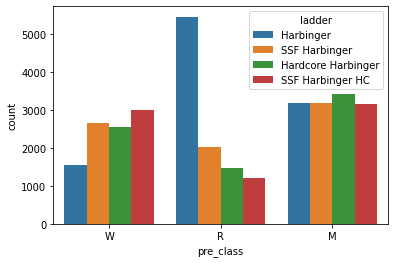

In [65]:
sns.countplot(data = df[df['stats_num'] == 1], x = 'pre_class', hue = 'ladder', hue_order = ['Harbinger', 'SSF Harbinger', 'Hardcore Harbinger', 'SSF Harbinger HC'])

### class-ladder Commentary

특정 모드별로 선호되는 클래스 즉, 클래스별로 어떤 모드에서 더 선호될 수도 있겠다는 생각을 했는데, 실제로 Ranger 직업군이 Harbinger에서 눈에띄게 선호됨을 볼 수 있다.

Harbinger모드는 솔로모드가 아니기 때문에 Ranger가 가지지 않은 다른 스킬들을 다른 사람이 채워줄 수 있다. 

한 가지 주목할 점은 Ranger는 민첩만 찍는 직업군으로, 그렇다면 어느 스탯이나 똑같이 채워주는 사람이 있다는 전제하에 좋은 성능을 보여주는 직업군으로 생각해 볼 수 있다.

다시 말해, 똑같이 한 스탯에 point를 올인을 한다고 했을 때 그 스탯의 장점을 잘 살려서 좋은 성능을 보여주는 것은 민첩이 아닐까 생각이 된다.

반대로 말하면 일정 수준 이상 많은 집중을 하지 않으면 성능이 덜 나올 수도 있거나, 누군가 보조해주지 않으면 성능을 받쳐주기 어렵다는 생각도 해볼 수 있다. 

왜냐면, 똑같이 한 스탯(힘)에 집중하는 Marauder 는 약 15000명을 모아둔 각 모드에서 비슷한 분포를 가지고 있었기 때문이다.

또한 Witch도 지능 한 스탯에 집중하는 직업군인데, 파티모드보다 다른 모드에서 더 많이 쓰였으며, 똑같이 HC가 아닌 솔로 Harbinger모드에서는 거의 1.7배에 가까운 캐릭터가 존재하고 있었다.

그렇다면 이 셋만 두고 비교를 해본다면?

# one stat class - ladder 

한 스탯만 찍은 사람들

In [48]:
df[df['stats_num'] == 1].describe()

,rank,level,experience,challenges,special_class,stat_Str,stat_Int,stat_Dex,stats_num
count,32876.000000,32876.000000,3.287600e+04,32876.000000,32876.000000,32876.000000,32876.000000,32876.000000,32876.0
mean,7466.882407,86.256266,1.932187e+09,26.360932,0.992031,0.394391,0.296691,0.308918,1.0
std,4329.881821,11.205555,1.120851e+09,8.576560,0.088916,0.488727,0.456806,0.462054,0.0
min,1.000000,53.000000,7.790982e+07,4.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3705.750000,80.000000,8.594550e+08,20.000000,1.000000,0.000000,0.000000,0.000000,1.0
50%,7448.500000,90.000000,1.983722e+09,26.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,11250.250000,95.000000,2.878193e+09,35.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,14978.000000,100.000000,4.250334e+09,40.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [49]:
df[df['stats_num'] == 1]['pre_class'].value_counts() / df[df['stats_num'] == 1].shape[0] * 100

0.5499866167023555

우선 게임모드를 나누기 전, 스탯 하나만 찍은 사람은 절반을 조금 넘는 수준이다.

In [50]:
df[df['stats_num'] == 1]['pre_class'].value_counts() / df[df['stats_num'] == 1].shape[0] * 100

M    39.439105
R    30.891836
W    29.669059
Name: pre_class, dtype: float64

In [66]:
df[df['stats_num'] == 1]['pre_class'].value_counts() / df.shape[0] * 100

M    21.690980
R    16.990096
W    16.317586
Name: pre_class, dtype: float64

그 안에서 각 직업별로 분포는 이러하다. 스탯을 하나만 찍은 직업군 자체에서 가장 많은 수는 힘을 선택한 사람들이다. 

### Harbinger 

그렇다면 게임 모드별로 이 수는 어떻게 변하는가?

In [51]:
# Harbinger

df[(df['stats_num'] == 1)&(df['ladder'] == 'Harbinger')].shape

(10192, 15)

In [71]:
# 이 모드에서 하나만 선택한 사람들의 비율

df[(df['stats_num'] == 1)&(df['ladder'] == 'Harbinger')].shape[0] / df[(df['ladder'] == 'Harbinger')].shape[0] * 100

68.32015015417616

In [52]:
df[(df['stats_num'] == 1)&(df['ladder'] == 'Harbinger')]['pre_class'].value_counts() / df[(df['stats_num'] == 1)&(df['ladder'] == 'Harbinger')].shape[0] * 100

R    53.473312
M    31.308870
W    15.217818
Name: pre_class, dtype: float64

In [ ]:
# 시각화


### SSF Harbinger 

In [59]:
# SSF arbinger

df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger')].shape

(7853, 15)

In [72]:
# 이 모드에서 하나만 선택한 사람들의 비율

df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger')].shape[0] / df[(df['ladder'] == 'Harbinger')].shape[0] * 100

52.64110470572463

In [60]:
df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger')]['pre_class'].value_counts() / df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger')].shape[0] * 100

M    40.659621
W    33.681396
R    25.658984
Name: pre_class, dtype: float64

In [ ]:
# 시각화

### Hardcore Harbinger

In [61]:
# Hardcore Harbinger

df[(df['stats_num'] == 1)&(df['ladder'] == 'Hardcore Harbinger')].shape

(7469, 15)

In [73]:
# 이 모드에서 하나만 선택한 사람들의 비율

df[(df['stats_num'] == 1)&(df['ladder'] == 'Hardcore Harbinger')].shape[0] / df[(df['ladder'] == 'Harbinger')].shape[0] * 100

50.067033114358495

In [62]:
df[(df['stats_num'] == 1)&(df['ladder'] == 'Hardcore Harbinger')]['pre_class'].value_counts() / df[(df['stats_num'] == 1)&(df['ladder'] == 'Hardcore Harbinger')].shape[0] * 100

M    45.882983
W    34.275003
R    19.842014
Name: pre_class, dtype: float64

In [ ]:
# 시각화

### SSF Harbinger HC

In [63]:
# SSF Harbinger Hardcore

df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger HC')].shape

(7362, 15)

In [74]:
# 이 모드에서 하나만 선택한 사람들의 비율

df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger HC')].shape[0] / df[(df['ladder'] == 'Harbinger')].shape[0] * 100

49.34977879072262

In [64]:
df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger HC')]['pre_class'].value_counts() / df[(df['stats_num'] == 1)&(df['ladder'] == 'SSF Harbinger HC')].shape[0] * 100

M    42.855202
W    40.722630
R    16.422168
Name: pre_class, dtype: float64

In [ ]:
# 시각화

In [ ]:
df['ladder'].describe()

In [ ]:
df['rank'].value_counts()

In [ ]:
df['rank'].value_counts().max()

각 랭크는 최대 4명으로 되어있다. 이것만 보아도 게임 모드에 따라 랭크가 구분되어 있음을 미루어 짐작해 볼 수 있다. 확인해본다.

In [ ]:
pd.pivot_table(data = df, index = ['ladder'], aggfunc = 'count')[['account', 'rank']]

아이디의 개수와 랭크의 개수가 일치하는 것으로 나왔다. 게임 모드에 따라 랭크가 구분되어 있음이 맞다.

개인적인 생각으로, 이 데이터는 rank별로 나열될 것이 아니라, ladder 별로 rank가 나열되어야 하는 것이 맞다고 생각이 된다.



In [ ]:
# 각 모드의 id, rank 고유 개수

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("ladder: ", i)
    print("values of unique id: ", df[df['ladder'] == i]['id'].nunique())
    print("values of unique rank: ", df[df['ladder'] == i]['rank'].nunique())
    print("max values of rank: ", df[df['ladder'] == i]['rank'].max())
    print('-------------------------------')

In [ ]:
df[df['ladder'] == 'Harbinger']['rank']

분명 모든 게임 모드에서 15000 등까지 있는 것으로 나타나지만 nunique를 넣어보면 일부 사라져 있다.

랭킹 개수 < 최대 랭크넘버 이기 때문에 동점자가 있는 것 같지는 않고, 크롤링 상의 문제이거나, 내부 데이터 상의 어떤 그런 것에 의해서 일부 없는 것으로 생각된다. (게임모드에서는 결측치가 없었기 때문)

등수는 절대적인 수치가 아니고, 나열 되어서 순서가 있을 때 의미가 존재하기 때문에 없는 등수를 채워서 총 14918 등까지 나타나도록 수정할 것이다.

## df divising

In [ ]:
df_Har = df[df['ladder'] == 'Harbinger']
df_HarHC = df[df['ladder'] == 'Hardcore Harbinger']
df_SHar = df[df['ladder'] == 'SSF Harbinger']
df_SHarHC = df[df['ladder'] == 'SSF Harbinger HC']

In [ ]:
df_Har

In [ ]:
df_Har['rank'].nunique()

rank 는 15000 까지 있지만 row는 12918 로 일부 유실되어있다. 이는 df_Har 뿐만이 아닐 것이다.

어떠한 이유에서든 없는 것은 지금 다시 가져올 수 없으므로, 빠지는 값이 없이 해주는 것이 더 정확한 계산을 가져올 수 있을 것이라 생각한다.

## Kinds of Path of Exile classes

해당 데이터셋에서, poe에는 ['Necromancer', 'Deadeye', 'Raider', 'Occultist', 'Pathfinder',
       'Guardian', 'Champion', 'Gladiator', 'Inquisitor', 'Elementalist',
       'Slayer', 'Berserker', 'Juggernaut', 'Ascendant', 'Trickster',
       'Hierophant', 'Chieftain', 'Saboteur', 'Assassin', 'Ranger',
       'Marauder', 'Scion', 'Witch', 'Duelist', 'Shadow', 'Templar']  총 24개의 unique 클래스가 존재하며,

POE 공식 사이트를 참고한 결과 각 직업별 클래스는 이렇게 나뉘고 있다.

    Duelist - 'Slayer', 'Gladiator', 'Champion'
    Shadow - 'Assassin', 'Saboteur', 'Trickster'
    Marauder(약탈자 라고 한다) - 'Juggernaut', 'Berserker', 'Chieftain',
    Witch - 'Necromancer', 'Elementalist', 'Occultist'
    Ranger - 'Raider', 'Deadeye', 'Pathfinder'
    Templar - 'Inquisitor', 'Hierophant', 'Guardian'
    Scion - 'Ascendant'
    
일반적으로 레인저는 원딜러, 듀얼리스트는 전사로 보이며, 위치는 마딜러, 템플러는 수도승 같은 등등 다른 게임에서 보이는 직업과 비슷한 부분이 있지만,

각 클래스가 가진 특성들도 다르기 때문에 poe에서 제공하고있는 클래스 별로도 나눌 수 있을 것이고, 일반적인 rpg 특성에 따라 이를 나누는 방법은 이런 방식들이 될 것이다.

    1. 탱커, 딜러, 힐러(보조직업)
    2. 탱커, 일반딜러, 암살딜러, 힐러(보조직업)
    2. 탱커, 근접딜러, 원거리딜러, 힐러(보조직업)
    3. 탱커, 근접딜러, 원거리물리딜러, 원거리마법딜러, 힐러(보조직업)
    4. 근거리, 원거리, 마법, 힐러(보조직업)
    5. 점사딜스킬위주, 광역딜스킬위주, 힐러(보조직업) ... 등등

이에 따라 각 클래스를 읽어보고 데이터 labeling을 진행하도록 한다.

스킬 범위나 세부 효과에 관련한 부분은 실제로 poe를 해본 사람이 분석하는 것이 더 바를 것 같다는 판단이 든다.

클래스의 호불호 혹은 성능을 떠나서, 세부적인 수치와 관련해서는 플레이 해보지 않는 이상 체감을 해볼 수 없기 때문이다.

예를 들어 템플러의 가디언은 방어 버프 혹은 적의 버프를 방해하는 스킬들이 있는데 상세히 알기는 어렵다.

---

https://hong-sam.tistory.com/27 글을 참조하여 일반적인 직업으로 나누는 것을 먼저 하기로 결정.

글에 따르면 
```
    Duelist : 빠른 근접 전투(힘, 민첩)
    Shadow : 민첩하고 지능적인 전투(민첩, 지능)
    Marauder : 전사(힘)
    Witch : 마법사(지능)
    Ranger : 궁수(민첩)
    Templar : 성기사(힘, 지능)
    Scion : 모든 스탯이 중간(힘, 민첩, 지능)
```

으로 나누어져있다. 사이온 같은 경우 성장 중 사이온을 구하는 퀘스트를 깨야 직업을 할 수 있다고 한다.

스킬을 찍는 데에 자유로운 것이 특징이나 자신의 원래 직업과 스탯에 따라 가는 것이 더 좋은 효율을 낼 수 있다는 점에서 다른 게임과 크게 다르지는 않다.

살펴본 결과 패시브 혹은 버프(디버프)스킬들도 많이 포함되어 있었다. 

자유도가 높지만 높아도 그 안에서 더 좋은 효율을 내는 일부 직업이나 스킬트리가 유행하여 해당 직업에는 한 클래스가 주를 이루기 마련인데, 그런 경향도 있는지 살펴보아야 겠다.

문제는 사이온인데, 사람마다 찍는 유형에 따라 근접일 수도 원거리일 수도, 완전히 보조 일수도, 그 중간 어딘가일 수도 있다.

여러 능력의 조합을 사용하는 것의 이점과 단점은 극명하기 때문에 숙련된 사람이 아니면 사이온을 달고 랭킹에 진입하기는 쉽지 않았을 것이라는 생각도 든다.


방식 1: 세부 클래스 전 직업(전직 전)으로 묶은 다음 그에 따라 labeling, 사이온은 사이온으로.
```
    근 - Duelist - 'Slayer', 'Gladiator', 'Champion'
    근 - Shadow - 'Assassin', 'Saboteur', 'Trickster'
    근 - Marauder - 'Juggernaut', 'Berserker', 'Chieftain',
    원 - Witch - 'Necromancer', 'Elementalist', 'Occultist'
    원 - Ranger - 'Raider', 'Deadeye', 'Pathfinder'
    원 - Templar - 'Inquisitor', 'Hierophant', 'Guardian'
    사이온 - Scion - 'Ascendant'
```
방식 2: 세부 클래스(전직 후)에 따라 labeling (딜 위주, 탱킹 위주, 보조 위주 - 게임 공부를 더 하고 나누는 걸로. EDA 하다보면 아이디어를 얻을수도 있고,)

    'Slayer' : 양손 무기, 생존력 특화 Duelist
    'Gladiator' : 쌍수 혹은 한손-방패 Duelist
    'Champion' : 적 디버프, 자신 버프 Duelist
    'Assassin' : 출혈, 독 등 이용한 치명 딜 위주 Shadow
    'Saboteur' : 트랩, 마인 활용 Shadow
    'Trickster' : 기동성, 회피, 공격속도 위주 Shadow
    'Juggernaut' : 탱킹 중심 Marauder
    'Berserker' : 흡혈이나 피해 비례 데미지 등 광전사 Marauder
    'Chieftain' : 화염, 적 디버프 이용 Marauder
    'Necromancer' : 소환술 특화 Witch
    'Elementalist' : 원소 피해 특화 Witch
    'Occultist' : 카오스 피해, 저주 특화 Witch
    'Raider' : 회피, 처치 후 얻는 버프를 이용하는 Ranger
    'Deadeye' : 치명타, 딜 중심 Ranger
    'Pathfinder' : 플라스크(물약), 치유효과 강화, 디버프 제거, 원소, 카오스 이용 Ranger
    'Inquisitor' : 원소 치명타, 마나 재생, 자신 버프 Templer
    'Hierophant' : 토템 및 마나 변환, 받은 피해 마나로 감소 등의 Templer
    'Guardian' : 서포트 및 보호(방어버프, 디버프제거, 치유 등) 특화 Templer
    'Ascendant' : 타 클래스들의 조합하는 Scion. 성능은 다소 떨어질 수 있음.

방식 3: 특정 스탯 한 가지 / 혹은 두 가지 / 세 가지

    'Marauder', 'Witch', 'Ranger'
    'Duelist', 'Shadow', 'Templar'
    'Scion'

In [ ]:
df_byladder['class'].unique()

전직 전과 전직 후 *모두 섞여있는 것* 또한 볼 수 있다. 이에 따라 이를 기준으로 나눌 수도 있다. 
전직 전과 후로 찍을 수 있는 스킬이 다를 것이기 때문이다. (물론 젬이 필요하다고 했기 때문에 그것이 없어서 그 직업을 운용중일 지도 모른다)

# class labeling

## ['special_class']: before and after to select special classes

In [ ]:
df

In [ ]:
df['special_class'] = 0

In [ ]:
pre_classes = ['Duelist', 'Shadow', 'Marauder', 'Witch', 'Ranger', 'Templar', 'Scion']

In [ ]:
df['special_class'] = np.where(df['class'].isin(pre_classes), 0, 1)

In [ ]:
df.head(10)

### How many ranked users in there who didn't select the special class?

In [ ]:
df['special_class'].value_counts()

In [ ]:
# 위와 같은 결과를 그룹바이로 낼 수 있다.

freq = df.groupby(['special_class']).size() 
print(freq)

### Then, what pre-classes of them are there?

In [ ]:
df[df['special_class'] == 0]['class'].value_counts()

위 결과를 보니 더더욱! 라벨링을 하는게 좋겠다는 생각이 드는데, 게임을 어떤 관점에서 볼지에 따라 나누는 방식을 달리할 수 있을 것이다.

포지션 자체인지 아니면 전체적인 스킬의 유형(사거리 등)에 관한 것인지 사람마다 중요시 하는 부분이 다르기 때문에... 

살펴보면 살펴볼 수록 이 게임은 사거리 자체보다는 포지션이나, 솔플 난이도 여부에 따라 갈리는게 나을 것 같다는 생각이 든다. 그래서 SSF 모드가 따로 있는 것이기도 한 이유일 것이다.

### What play modes of them are there?

In [ ]:
df[df['special_class'] == 0]['ladder'].value_counts()

독특하게도, 전직하지 않은 사람들은 일반 Harbinger 에는 없었고, 대부분 솔로 플레이모드에 많았다.

아무래도 전직이라는 건 세부 직업을 고르는 것, 즉 특화를 하는 것이기 때문에 특화되지 않은 다른 면에서는 부족해질 수 있다고 생각해보면, 

솔로플레이에서는 전직하지 않은 직업으로 플레이 하는게 더 나을 수도 있다는 생각이다. 물론 스킬을 찍는 포인트가 한정되어있다는 사실 안에 말이다.



###  df_pre_cl : stats description by whether pre or post special classes

전직을 하지 않은 사람들과 한 사람들의 통계적 요약을 보고자 한다.

In [ ]:
df_pre_cl = df[df['special_class'] == 0]
df_pre_cl

In [ ]:
df_pre_cl.describe()

평균 랭크 자체는 높은 편이아니고, 레벨의 최대 값은 94였다. 최대 레벨이 100인 점을 감안할 때 물음표가 생길 수 밖에 없는 부분이다. 게임을 정확히 이해하지 않고서는 풀기 어려운 의문인 것 같다.

반대로 전직을 한 사람들을 보자면, 

In [ ]:
df[df['special_class'] == 1].describe()

세부 클래스로 전직한 평균 랭크가 약 3천 이상 더 높고, 레벨도 평균적으로 더 높다. 

하지만 경험치는 그들보다 평균적으로 더 적었고, 시도도 더 많이 한 것으로 나타났다.

이를 토대로 합리적의심을 해보자면, 숙련도나 게임 경력에 따라서 전직 여부를 결정하지는 않았을 것이라고 추측해 볼 수 있다.

## ['stat_Str', 'stat_Int', 'stat_Dex']: columns by kind of stats and stats numbers

먼저, 특정 스탯 한 가지 / 혹은 두 가지 / 세 가지

    'Marauder', 'Witch', 'Ranger'
    'Duelist', 'Shadow', 'Templar' 
    'Scion'

에 따라 stat_num(개수) 을 1, 2, 3으로 나누게 될 것이다.

각 클래스에 따라 어떤 특성을 찍었는지 특성(힘, 민첩, 지능) 을 나누어서 여부를 라벨링 한 다음 sum 으로 낼 계획


In [ ]:
# 각 클래스 나누기 (전직하지 않은 사람들도 있기 때문에 각 전직 이전 직업도 넣어준다.)

# 한 개인 직업
Marauder = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain'] # Strength
Witch = ['Witch', 'Necromancer', 'Elementalist', 'Occultist'] # Intelligence
Ranger = ['Ranger', 'Raider', 'Deadeye', 'Pathfinder'] # Dexterity

# 두 개인 직업
Duelist = ['Duelist', 'Slayer', 'Gladiator', 'Champion'] # Strength, Dexterity
Shadow = ['Shadow', 'Assassin', 'Saboteur', 'Trickster'] # Dexterity, Intelligence
Templar = ['Templar', 'Inquisitor', 'Hierophant', 'Guardian'] # Intelligence, Strength

# 세 개인 직업
Scion = ['Scion', 'Ascendant'] # Strength, Dexterity, Intelligence